# Praca domowa TWD nr 6 
## Karolina Nieciecka

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [16]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chess_king_rook_vs_king = fetch_ucirepo(id=23) 
  
# data (as pandas dataframes) 
X = chess_king_rook_vs_king.data.features 
y = chess_king_rook_vs_king.data.targets 
  
X.loc[:,'white-depth-of-win'] = y
X


,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,sixteen
28052,b,1,g,7,e,6,sixteen
28053,b,1,g,7,e,7,sixteen
28054,b,1,g,7,f,5,sixteen


In [ ]:
#przygotowanie danych
df = X 
mapowanie1 = {'a' : 1, 'b' : 2, 'c' : 3, 'd' : 4, 'e' : 5, 'f' : 6, 'g' : 7, 'h' : 8}
df.iloc[:,0] = pd.to_numeric(df.iloc[:,0].map(mapowanie1))
df.iloc[:,2] = pd.to_numeric(df.iloc[:,2].map(mapowanie1))
df.iloc[:,4] = pd.to_numeric(df.iloc[:,4].map(mapowanie1))
df


,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win
0,1,1,2,3,3,2,draw
1,1,1,3,1,3,2,draw
2,1,1,3,1,4,1,draw
3,1,1,3,1,4,2,draw
4,1,1,3,2,3,1,draw
...,...,...,...,...,...,...,...
28051,2,1,7,7,5,5,sixteen
28052,2,1,7,7,5,6,sixteen
28053,2,1,7,7,5,7,sixteen
28054,2,1,7,7,6,5,sixteen


In [41]:
mapowanie2 = {'draw' : -1, 'zero': 0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6,
       'seven':7, 'eight':8, 'nine':9, 'ten':10, 'eleven':11, 'twelve':12, 'thirteen':13,
       'fourteen':14, 'fifteen':15, 'sixteen':16}
df.loc[:, "white-depth-of-win"] = pd.to_numeric(df.loc[:,'white-depth-of-win'].map(mapowanie2))
df

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win,odl_wking_bking_euklides,odl_wking_bking_manhattan,odl_wking_bking_czebyszewa,odl_bking_krawedz
0,1,1,2,3,3,2,-1,2.236068,3,2,1
1,1,1,3,1,3,2,-1,2.236068,3,2,1
2,1,1,3,1,4,1,-1,3.0,3,3,0
3,1,1,3,1,4,2,-1,3.162278,4,3,1
4,1,1,3,2,3,1,-1,2.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
28051,2,1,7,7,5,5,16,5.0,7,4,3
28052,2,1,7,7,5,6,16,5.830952,8,5,2
28053,2,1,7,7,5,7,16,6.708204,9,6,1
28054,2,1,7,7,6,5,16,5.656854,8,4,2


In [42]:
# do pytania 2.
df.loc[:, 'odl_wking_bking_euklides'] = (
    np.square(df.loc[:, 'white-king-file'] - df.loc[:, 'black-king-file']) + 
    np.square(df.loc[:, 'white-king-rank'] - df.loc[:, 'black-king-rank'])
    )**0.5
df.loc[:, 'odl_wking_bking_manhattan'] = (
    np.abs(df.loc[:, 'white-king-file'] - df.loc[:, 'black-king-file']) + 
    np.abs(df.loc[:, 'white-king-rank'] - df.loc[:, 'black-king-rank'])
    )
df.loc[:, 'odl_wking_bking_czebyszewa'] = (
    np.maximum(np.abs(df.loc[:, 'white-king-file'] - df.loc[:, 'black-king-file']),
           np.abs(df.loc[:, 'white-king-rank'] - df.loc[:, 'black-king-rank']))
)
# do pytania 3.
odl = np.asanyarray(
    [df.loc[:,'black-king-file'] - 1,
    8 - df.loc[:,'black-king-file'],
    df.loc[:,'black-king-rank'] - 1,
    8 - df.loc[:,'black-king-rank']]
)
odl = odl.min(axis = 0)
df.loc[:,'odl_bking_krawedz'] = odl
df

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win,odl_wking_bking_euklides,odl_wking_bking_manhattan,odl_wking_bking_czebyszewa,odl_bking_krawedz
0,1,1,2,3,3,2,-1,2.236068,3,2,1
1,1,1,3,1,3,2,-1,2.236068,3,2,1
2,1,1,3,1,4,1,-1,3.0,3,3,0
3,1,1,3,1,4,2,-1,3.162278,4,3,1
4,1,1,3,2,3,1,-1,2.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
28051,2,1,7,7,5,5,16,5.0,7,4,3
28052,2,1,7,7,5,6,16,5.830952,8,5,2
28053,2,1,7,7,5,7,16,6.708204,9,6,1
28054,2,1,7,7,6,5,16,5.656854,8,4,2


## Pytanie 1.

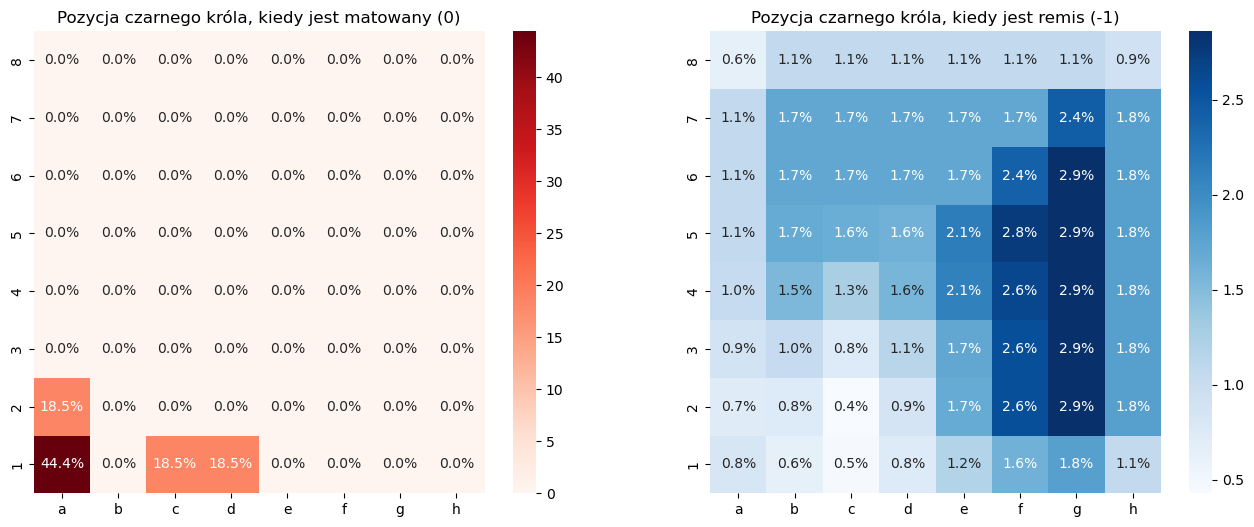

In [66]:
#Pytanie 1
df11 = df.loc[df.loc[:,'white-depth-of-win'] == 0,['black-king-file', 'black-king-rank','white-depth-of-win']]
n1 = df11.shape[0]
praw1 = np.zeros((8,8))
for i in range(1, 9):
    for j in range(1,9):
        p = df11.loc[(df11.loc[:, 'black-king-rank'] == i) & (df11.loc[:,'black-king-file'] == j),:].shape[0]
        praw1[i-1][j-1] = p/n1*100

df12 = df.loc[df.loc[:,'white-depth-of-win'] == -1,['black-king-file', 'black-king-rank','white-depth-of-win']]
n2 = df12.shape[0]
praw2 = np.zeros((8,8))
for i in range(1, 9):
    for j in range(1,9):
        p = df12.loc[(df12.loc[:, 'black-king-rank'] == i) & (df12.loc[:,'black-king-file'] == j),:].shape[0]
        praw2[i-1][j-1] = p/n2*100

lab1 = np.array([["{0:.1f}%".format(value) for value in row] for row in praw1])
lab2 = np.array([["{0:.1f}%".format(value) for value in row] for row in praw2])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
labels_x = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
labels_y = [1, 2, 3, 4, 5, 6, 7, 8]


sns.heatmap(praw1, annot=lab1, fmt="", cmap="Reds", ax=ax1,
            xticklabels=labels_x, yticklabels=labels_y)
ax1.set_title("Pozycja czarnego króla, kiedy jest matowany (0)")
ax1.invert_yaxis() 


sns.heatmap(praw2, annot=lab2, fmt="", cmap="Blues", ax=ax2,
            xticklabels=labels_x, yticklabels=labels_y)
ax2.set_title("Pozycja czarnego króla, kiedy jest remis (-1)")
ax2.invert_yaxis() 

plt.show()

Na powyższej wizualizacji przedstawione są prawdopodobieństwa (w %) pozycji czarnego króla w sytuacji: (1) kiedy jest matowany (2) kiedy gra kończy się remisem. \
Czarny król zwykle znajduje się na pozycji a1, kiedy jest matowany(z dokładnością do symetrii). \
Kiedy gra kończy się remisem, zwykle jest na pozycjach: g6, g5, g4, g3 lub g2 (z dokładnością do symetrii).

## Pytanie 2.

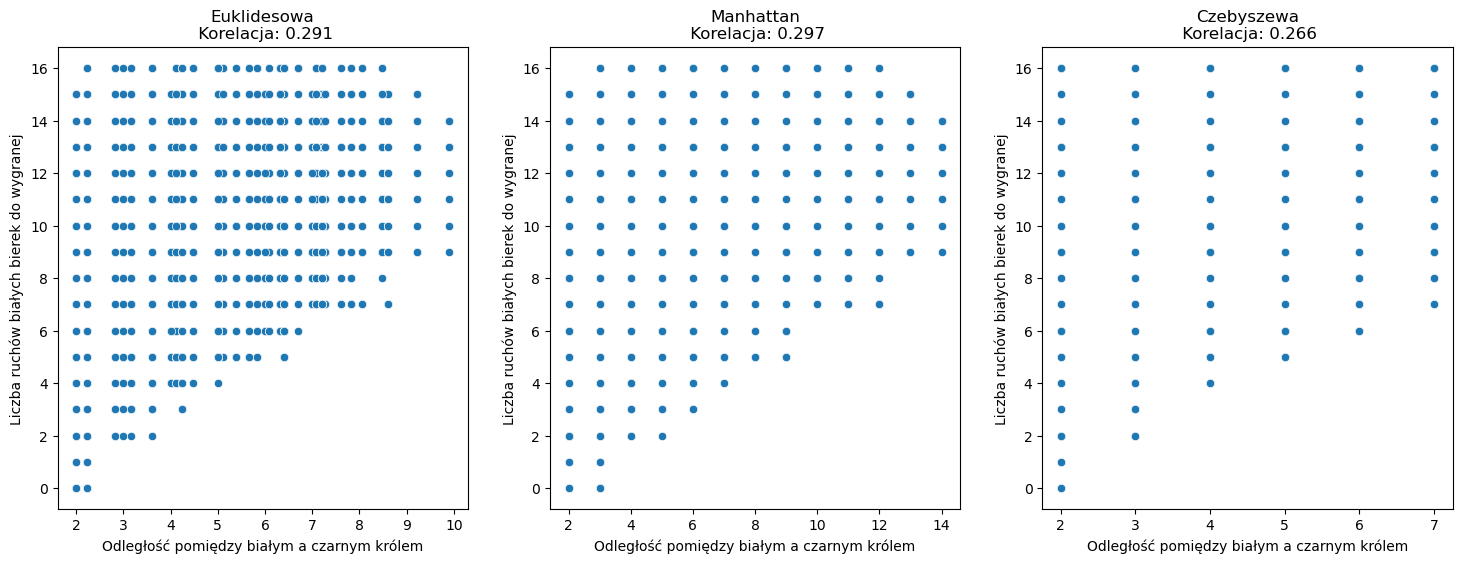

In [91]:
# Pytanie 2
df2 = df.loc[df.loc[:, 'white-depth-of-win'] != -1, ['white-depth-of-win', 'odl_wking_bking_euklides','odl_wking_bking_manhattan','odl_wking_bking_czebyszewa'] ]

metryki = ['odl_wking_bking_euklides', 'odl_wking_bking_manhattan', 'odl_wking_bking_czebyszewa']
nazwy = ['Euklidesowa', 'Manhattan', 'Czebyszewa']
korelacje = df2[metryki + ['white-depth-of-win']].corr()['white-depth-of-win']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metryka in enumerate(metryki):
    sns.scatterplot(data=df2, 
                x=metryka, 
                y='white-depth-of-win', 
                ax=axes[i])
    
    axes[i].set_title(f"{nazwy[i]}\n Korelacja: {korelacje[metryka]:.3f}")
    axes[i].set_xlabel("Odległość pomiędzy białym a czarnym królem")
    axes[i].set_ylabel("Liczba ruchów białych bierek do wygranej")

plt.show()



Wizualizacja powyżej przedstawia zależności pomiędzy liczbą ruchów białych bierek potrzebną do wygranej i odległością między czarnym i białym królem mierzoną w trzech metrykach: Euklidesowej, Manhattan, Czebyszewa. Dodatkowo obliczyłam wskaźnik korelacji Pearsona dla każdej odległości.\
We wszystkich trzech przypadkach korelacja jest słaba.
Najwyższy wynk korelacji uzyskała metryka Manhattan, co oznacza że jest ona najbardziej powiązana z badaną zależnością.

## Pytanie 3.

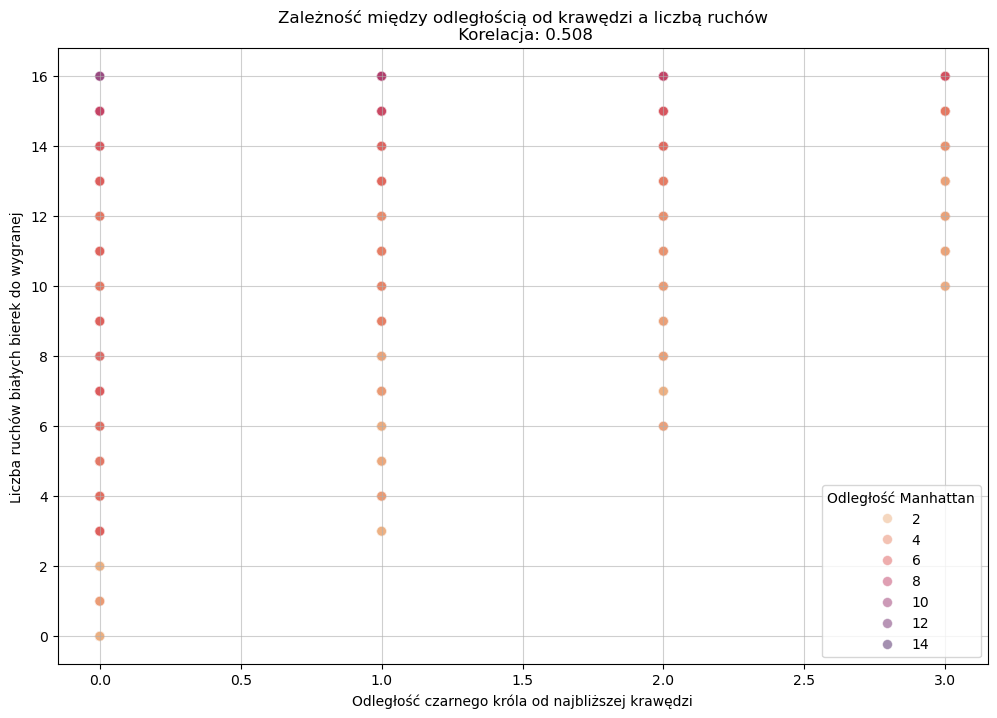

In [107]:
df3 = df.loc[df.loc[:, 'white-depth-of-win'] != -1, ['white-depth-of-win', 'odl_wking_bking_manhattan', 'odl_bking_krawedz'] ]

korelacja = df3['odl_bking_krawedz'].corr(df3['white-depth-of-win'])

plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data = df3,
    x = 'odl_bking_krawedz', 
    y = 'white-depth-of-win',
    hue = 'odl_wking_bking_manhattan',
    palette = 'flare',
    s = 50,
    alpha = 0.5,
    legend = 'brief'
)

plt.title(f"Zależność między odległością od krawędzi a liczbą ruchów\n Korelacja: {korelacja:.3f}")
plt.xlabel("Odległość czarnego króla od najbliższej krawędzi")
plt.ylabel("Liczba ruchów białych bierek do wygranej")
plt.legend(title = 'Odległość Manhattan')
plt.grid(True, alpha=0.6)

plt.show()

Na powyższym wykresie pokazana jest zależność między liczbą ruchów białych bierek potrzebną do wygranej oraz odległości czarnego króla od najbliższej krawędzi. Obliczyłam również wskaźnik korelacji Pearsona.\
Wskaźnik korelacji wynosi ok. 0,5, co ozancza, że położenie czarnego króla względem krawędzi jest związane z liczbą ruchów potrzebnych do wygranej. Można zauważyć, że im dalej od krawędzi znajduje się czarny król, tym więcej ruchów przeciwnik musi wykonać, aby wygrać.\
Dodatkowo można zauważyć, że punkty o dużej odległości Manhattan znajdują się w górnej części wykresu, a o małej odległości - w dolnej. Wniosek: uzupełnienie informacji o odległość pomiędzy białym a czarnym królem pomaga w określeniu w ilu ruchach zakończy się gra.